In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 46s 0us/step


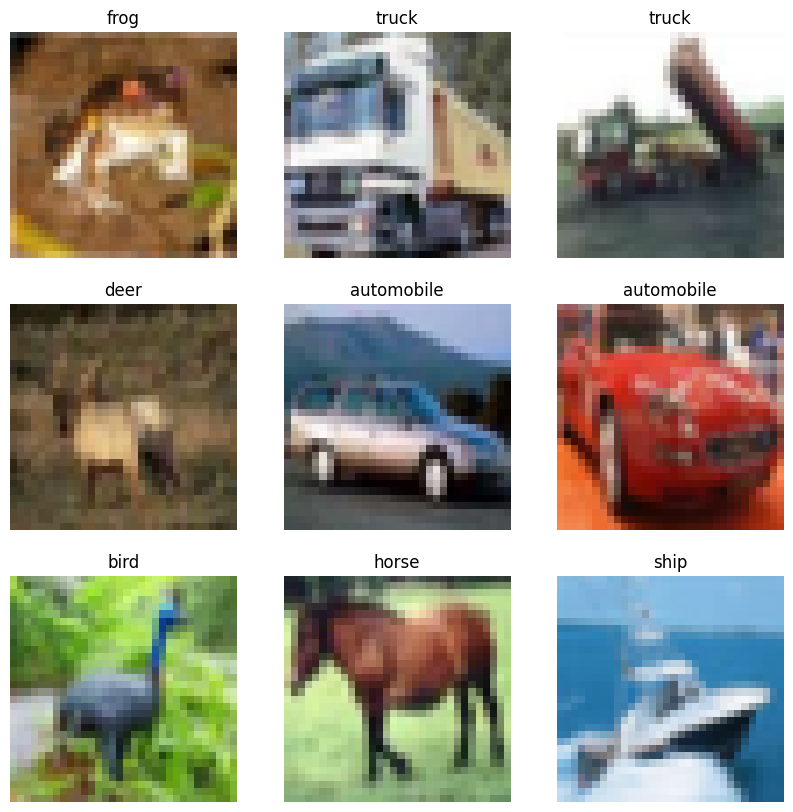

In [6]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [7]:
# Step 4: Build the CNN Model
model = models.Sequential([
#Task 1: Model Architecture Enhancement
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    
    
    layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    
    layers.Flatten(),
    layers.Dense(288, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    
    layers.Dense(10, activation='softmax')

])
# Display model summary
model.summary()

c:\Users\mirol\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 288)            │     2,359,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 288)            │         1,152 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,466,250 (9.41 MB)

 Trainable params: 2,465,610 (9.41 MB)

 Non-trainable params: 640 (2.50 KB)

In [8]:
#Task 2: Hyperparameter Optimization
from tensorflow.keras.optimizers import Adam
#learning rate0.0008
model.compile(Adam(learning_rate=0.001),
#loss function
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
from tensorflow.keras import callbacks

#EarlyStopping
early_stop = callbacks.EarlyStopping(
    monitor='val_loss', patience=7, restore_best_weights=True)

from tensorflow.keras.callbacks import ReduceLROnPlateau

#lr_scheduler
lr_scheduler = ReduceLROnPlateau(
            monitor='val_accuracy',
            factor=0.7,
            patience=2,
        )

In [9]:
#Task 3: Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen.fit(train_images)

train_generator = train_datagen.flow(train_images, train_labels, batch_size=64)


history = model.fit(train_generator, epochs=10,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_scheduler,early_stop])

Epoch 1/10


c:\Users\mirol\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 67ms/step - accuracy: 0.3971 - loss: 1.7085 - val_accuracy: 0.5234 - val_loss: 1.3787 - learning_rate: 0.0010
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 77ms/step - accuracy: 0.6030 - loss: 1.1313 - val_accuracy: 0.6512 - val_loss: 1.0569 - learning_rate: 0.0010
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.6539 - loss: 0.9809 - val_accuracy: 0.6734 - val_loss: 0.9931 - learning_rate: 0.0010
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.6878 - loss: 0.8993 - val_accuracy: 0.7277 - val_loss: 0.7798 - learning_rate: 0.0010
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.7066 - loss: 0.8371 - val_accuracy: 0.7008 - val_loss: 0.9046 - learning_rate: 0.0010
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 79ms/step - accuracy: 0.7236 - loss: 0.7923 - val_accuracy: 0.7142 - val_loss: 0.8911 - learning_rate: 0.0010
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.7416 - loss: 0.7399

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 2s - 6ms/step - accuracy: 0.7816 - loss: 0.6446

Test accuracy: 0.7816


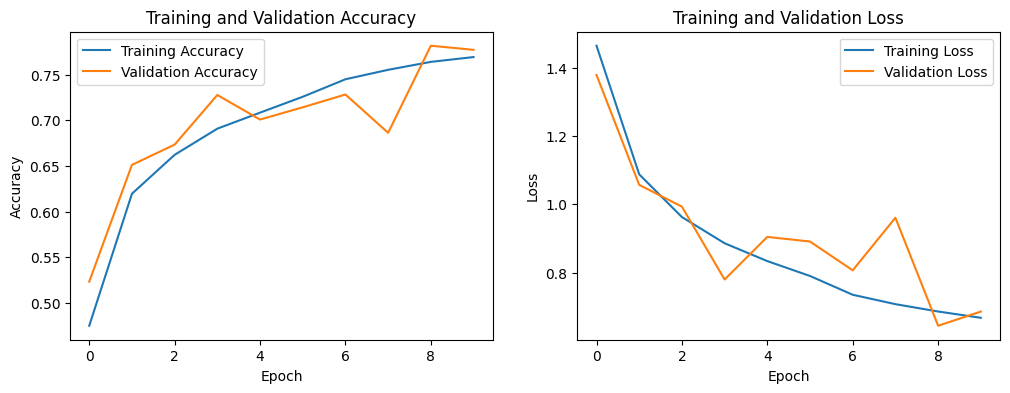

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    correct = "✅" if predicted_label == true_label else "❌"
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}{correct}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Image 1: Predicted: cat, True: cat✅
Image 2: Predicted: ship, True: ship✅
Image 3: Predicted: automobile, True: ship❌
Image 4: Predicted: airplane, True: airplane✅
Image 5: Predicted: frog, True: frog✅


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


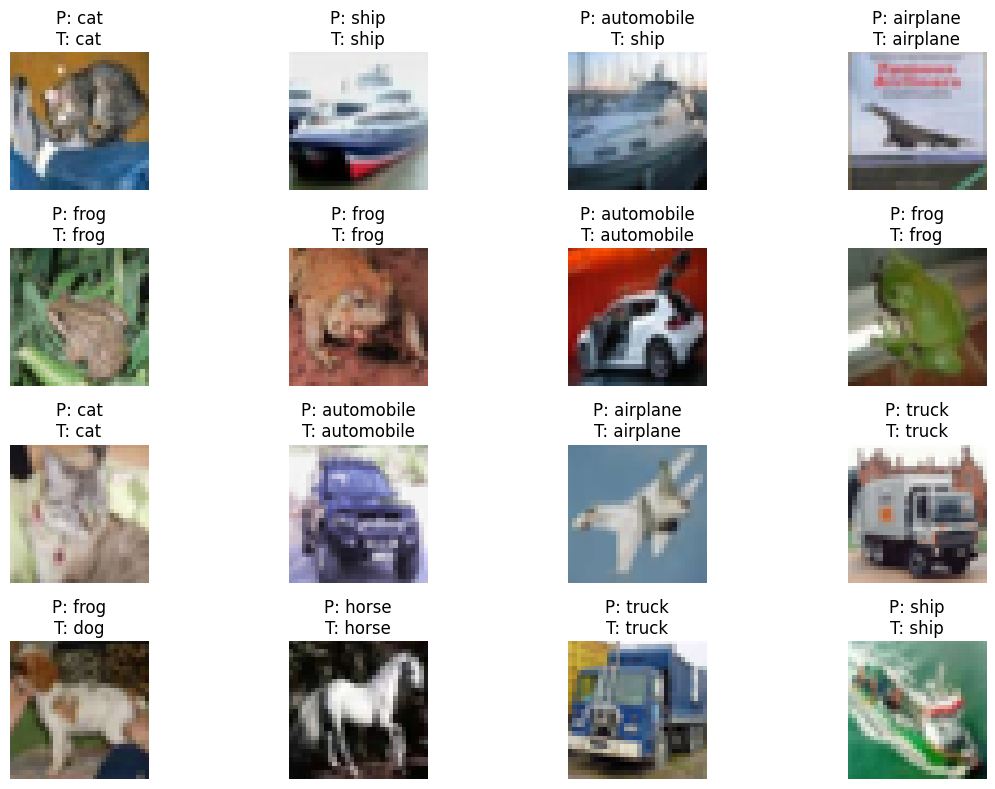

In [14]:
#Task 4: Visualization
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

test_labels = test_labels.flatten()

plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(test_images[i])
    plt.title(f"P: {class_names[predicted_labels[i]]}\nT: {class_names[test_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.7816
Test Loss: 0.6446
Final Training Accuracy: 0.7692
Final Validation Accuracy: 0.7771
Final Training Loss: 0.6678
Final Validation Loss: 0.6860
Training Epochs: 10
Model Parameters: 2466250


## Task 5:Report
### task 1
- 總共使用了 4 個卷積層（Conv2D）
- 前兩層用 32 個濾波器
- 接著一層 64，再一層 128
- 每層卷積的濾波器數量逐漸增加（32 → 64 → 128），加強高階特徵學習。
- 所有卷積層都使用 核大小為 (3, 3)。
### task 2
- 優化器：Adam（適應性學習率，訓練快速穩定）
- 學習率：0.001
- CIFAR-10 資料集中標籤格式為整數，因此使用sparse_categorical_crossentropy作為loss function
### task 3
- 使用以下方式實現數據增強技術:隨機旋轉、隨機縮放、隨機剪切、水平平移、垂直平移、隨機水平翻轉、邊緣像素補齊
### task 4
- 繪出訓練/驗證的準確率與損失曲線
- 有助於觀察過擬合、欠擬合等現象
- 顯示前 5 張圖片的預測類別與實際類別，並加上 ✅❌ 直觀比對正確與否。
- 一次顯示 16 張測試圖片，每張圖顯示模型預測類別（P）與真實類別（T）
